# Importing libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import keras

# Dataset compiling for binary

In [ ]:
df= pd.read_csv("CICIoT2023.csv",low_memory=False)

In [ ]:
df.head(5)

In [ ]:
attack = []
for label in df['label']:
    if label == 'BenignTraffic':
        attack.append(0)  # Assign 0 for "BenignTraffic"
    else:
        attack.append(1)  # Assign 1 for any other traffic type

# Create a new column 'traffic_type' and store the results
df['attack'] = attack



In [ ]:
data= df.sample(frac=1).reset_index(drop=True)

In [ ]:
data= data.drop(columns=['label'])

In [ ]:
data.to_csv('CICIoT2023_binary.csv', index=False)

# Loading The Final dataset

In [7]:
dataset= pd.read_csv("CICIoT2023_binary.csv",low_memory=False)

In [8]:
dataset.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,attack
0,4.392135,129.74,6.00,140.40,0.559296,0.559296,0.0,0.0,1.0,0.0,...,0.755748,54.80,8.298563e+07,9.5,10.476807,1.068711,1.503081,0.38,141.55,1
1,0.000000,53.46,5.94,63.36,1.267193,1.267193,0.0,1.0,0.0,1.0,...,0.040218,54.06,8.334421e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,1
2,1.103960,87.09,6.00,63.78,1.571309,1.571309,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336180e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
3,0.000000,0.00,1.00,64.00,3.877044,3.877044,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314963e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1
4,0.000000,54.00,6.00,64.00,2.095570,2.095570,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331821e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1


In [9]:
dataset.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,attack
count,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,...,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07
mean,5.765449e+00,7.670596e+04,9.065690e+00,6.635072e+01,9.064057e+03,9.064057e+03,5.463949e-06,8.657207e-02,2.073353e-01,9.050473e-02,...,3.332481e+01,1.246916e+02,8.318253e+07,9.498489e+00,1.312182e+01,4.709498e+01,3.072436e+04,9.643760e-02,1.415124e+02,9.764773e-01
std,2.850342e+02,4.613317e+05,8.945533e+00,1.401919e+01,9.956249e+04,9.956249e+04,7.250766e-03,2.812070e-01,4.053978e-01,2.869035e-01,...,1.603357e+02,2.415493e+02,1.704735e+07,8.191532e-01,8.628579e+00,2.267696e+02,3.237107e+05,2.330010e-01,2.106831e+01,1.515566e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.091856e+00,2.091856e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,1.000000e+00
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.575423e+01,1.575423e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,1.000000e+00
75%,1.051381e-01,2.805550e+02,1.433000e+01,6.400000e+01,1.173848e+02,1.173848e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.719096e-01,5.406000e+01,8.334391e+07,9.500000e+00,1.039671e+01,5.059213e-01,1.344216e+00,8.000000e-02,1.415500e+02,1.000000e+00
max,3.943572e+05,9.907148e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.971522e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.238524e+04,1.358300e+04,1.676394e+08,1.500000e+01,1.648211e+02,1.755127e+04,1.549022e+08,1.000000e+00,2.446000e+02,1.000000e+00


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686579 entries, 0 to 46686578
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP       

In [11]:
dataset.shape

(46686579, 47)

# Data Preprocessing

In [12]:
dataset.isna().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
attack             0
dtype: int64

In [13]:
dataset.drop_duplicates(subset=None, keep="first", inplace=True)
dataset.duplicated().sum()


0

In [14]:
dataset['attack'].value_counts()

attack
1    45588350
0     1098195
Name: count, dtype: int64

In [15]:
def encod(data):
  n=data.shape[1]
  from sklearn import preprocessing
  label_encoder = preprocessing.LabelEncoder()
  for i in range(n):
      if data.iloc[:,i].dtype == 'object':
        data.iloc[:,i]= label_encoder.fit_transform(data.iloc[:,i])
  return data

In [16]:
# Label encoding
dataset=encod(dataset)
dataset

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,attack
0,4.392135,129.74,6.00,140.40,0.559296,0.559296,0.0,0.0,1.0,0.0,...,0.755748,54.80,8.298563e+07,9.5,10.476807,1.068711,1.503081,0.38,141.55,1
1,0.000000,53.46,5.94,63.36,1.267193,1.267193,0.0,1.0,0.0,1.0,...,0.040218,54.06,8.334421e+07,9.5,10.393232,0.057331,0.054789,0.03,141.55,1
2,1.103960,87.09,6.00,63.78,1.571309,1.571309,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336180e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
3,0.000000,0.00,1.00,64.00,3.877044,3.877044,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314963e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1
4,0.000000,54.00,6.00,64.00,2.095570,2.095570,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331821e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686574,0.321089,27692.12,16.45,69.22,15900.657901,15900.657901,0.0,0.0,0.0,0.0,...,1.944637,51.35,8.301648e+07,9.5,10.076371,2.756421,38.180996,0.12,141.55,1
46686575,0.000000,0.00,1.00,64.00,29.622674,29.622674,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1
46686576,0.000000,54.00,6.00,64.00,2.179378,2.179378,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331451e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
46686577,0.170920,29381.00,17.00,64.00,4314.353282,4314.353282,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.312383e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,1


In [17]:
dataset.attack.unique()

array([1, 0], dtype=int64)

In [18]:
X=dataset.drop(['attack'],axis=1)
y=dataset['attack']
dataset=0

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_sm, y_sm  = rus.fit_resample(X, y)
y_sm = pd.Series(y_sm)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm = pd.Series(y_sm)

In [22]:
pd.Series(y_sm).value_counts()

attack
0    1098195
1    1098195
Name: count, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

In [24]:
X=0
y=0
X_sm=0
y_sm=0

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
X_train.shape

(1757112, 46)

# Vanilla Autoencoder Model

In [27]:

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU



# Now any TensorFlow operation will run on the CPU
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)



from keras.layers import Dense, Dropout, Activation

In [28]:
input_dim = X_train.shape[1]

In [29]:
input_vanilla = tf.keras.Input(shape=(input_dim,), name='input_vanilla')
encoded_vanilla = Dense(128, activation='relu', name='encode1_vanilla')(input_vanilla)
encoded_vanilla = Dense(64, activation='relu', name='encode2_vanilla')(encoded_vanilla)
encoded_vanilla = Dense(32, activation='relu', name='latent_vanilla')(encoded_vanilla)

decoded_vanilla = Dense(64, activation='relu', name='decode1_vanilla')(encoded_vanilla)
decoded_vanilla = Dense(128, activation='relu', name='decode2_vanilla')(decoded_vanilla)
output_vanilla = Dense(input_dim, activation='sigmoid', name='output_vanilla')(decoded_vanilla)



In [30]:
vanilla = tf.keras.Model(input_vanilla, output_vanilla)

vanilla.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_vanilla (InputLayer)  [(None, 46)]              0         
                                                                 
 encode1_vanilla (Dense)     (None, 128)               6016      
                                                                 
 encode2_vanilla (Dense)     (None, 64)                8256      
                                                                 
 latent_vanilla (Dense)      (None, 32)                2080      
                                                                 
 decode1_vanilla (Dense)     (None, 64)                2112      
                                                                 
 decode2_vanilla (Dense)     (None, 128)               8320      
                                                                 
 output_vanilla (Dense)      (None, 46)                5934  

In [31]:
vanilla.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=6,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'vanillamodel_CICIoT2023_smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)

callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=vanilla.fit(X_train, X_train,epochs=100,batch_size=32, callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))



Epoch 1/100
54910/54910 [==============================] - 159s 3ms/step - loss: 5.7737e-04
Epoch 2/100
54910/54910 [==============================] - 164s 3ms/step - loss: 6.0147e-05
Epoch 3/100
54910/54910 [==============================] - 169s 3ms/step - loss: 5.3264e-05
Epoch 4/100
54910/54910 [==============================] - 170s 3ms/step - loss: 4.8929e-05
Epoch 5/100
54910/54910 [==============================] - 166s 3ms/step - loss: 4.7969e-05
Epoch 6/100
54910/54910 [==============================] - 165s 3ms/step - loss: 1.7788e-05
Epoch 7/100
54910/54910 [==============================] - 169s 3ms/step - loss: 1.6248e-05
Epoch 8/100
54910/54910 [==============================] - 168s 3ms/step - loss: 1.5935e-05
Epoch 9/100
54910/54910 [==============================] - 169s 3ms/step - loss: 1.7505e-05
Epoch 10/100
54910/54910 [==============================] - 166s 3ms/step - loss: 1.4612e-05
Epoch 11/100
54910/54910 [==============================] - 169s 3ms/step - los

In [ ]:
# model_checkpoint_callback
# checkpoint_filepath = 'vaAEmodel.keras'
# #EarlyStopping callback
# vanilla_autoencoder = keras.models.load_model(checkpoint_filepath)
# early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=4,baseline=None,restore_best_weights=False,)


# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)


# callbacks = [early_stopping_callback, model_checkpoint_callback]
# #train with both callbacks
# history=vanilla.fit(X_train, X_train,epochs=50,batch_size=32, callbacks=[callbacks],verbose=1,initial_epoch=30)

# print("Number of epochs run:", len(history.history['loss']))



In [33]:
vanilla.evaluate(X_test,X_test)

13728/13728 [==============================] - 21s 1ms/step - loss: 8.1237e-06


8.123677616822533e-06

In [34]:
#checkpoint_filepath = 'vanillamodel_NBaIoT.keras'
#vanilla = keras.models.load_model(checkpoint_filepath)
for layer in vanilla.layers:
    layer.trainable =False

vanilla.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_vanilla (InputLayer)  [(None, 46)]              0         
                                                                 
 encode1_vanilla (Dense)     (None, 128)               6016      
                                                                 
 encode2_vanilla (Dense)     (None, 64)                8256      
                                                                 
 latent_vanilla (Dense)      (None, 32)                2080      
                                                                 
 decode1_vanilla (Dense)     (None, 64)                2112      
                                                                 
 decode2_vanilla (Dense)     (None, 128)               8320      
                                                                 
 output_vanilla (Dense)      (None, 46)                5934  

# Variational Autoencoder Model

In [35]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Concatenate
from tensorflow.keras.losses import mse

from keras import layers

In [36]:
# this sampling layer is the bottleneck layer of variational autoencoder,
# it uses the output from two dense layers z_mean and z_log_var as input, 
# convert them into normal distribution and pass them to the decoder layer

class Sampling(layers.Layer):
	"""Uses (mean, log_var) to sample z, the vector encoding a digit."""

	def call(self, inputs):
		mean, log_var = inputs
		batch = tf.shape(mean)[0]
		dim = tf.shape(mean)[1]
		epsilon = tf.random.normal(shape=(batch, dim))
		return mean + tf.exp(0.5 * log_var) * epsilon


In [37]:
latent_dim = 16
#encoder
encoder_inputs = keras.Input(shape=(input_dim,),name='encoder_input')
x = layers.Dense(128, activation="relu",name="encoder1")(encoder_inputs)
x = layers.Dense(64, activation="relu",name="enocder2")(x)
x = layers.Dense(32, activation="relu",name="encoder_latent_vae")(x)
mean = layers.Dense(latent_dim, name="mean")(x)
log_var = layers.Dense(latent_dim, name="log_var")(x)
z = Sampling()([mean, log_var])

encoder = keras.Model(encoder_inputs, [mean, log_var, z], name="encoder")
encoder.summary()



Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 46)]         0           []                               
                                                                                                  
 encoder1 (Dense)               (None, 128)          6016        ['encoder_input[0][0]']          
                                                                                                  
 enocder2 (Dense)               (None, 64)           8256        ['encoder1[0][0]']               
                                                                                                  
 encoder_latent_vae (Dense)     (None, 32)           2080        ['enocder2[0][0]']               
                                                                                            

In [38]:
#decoder

latent_inputs = keras.Input(shape=(latent_dim,),name='decoder_input')
x = layers.Dense(32, activation="relu",name="decoder1_vae")(latent_inputs)
x = layers.Dense(64, activation="relu", name="decoder2_vae")(x)
x = layers.Dense(128, activation="relu", name="decoder3_vae")(x)
decoder_outputs = layers.Dense(input_dim, activation="sigmoid", name='decoder_output')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 16)]              0         
                                                                 
 decoder1_vae (Dense)        (None, 32)                544       
                                                                 
 decoder2_vae (Dense)        (None, 64)                2112      
                                                                 
 decoder3_vae (Dense)        (None, 128)               8320      
                                                                 
 decoder_output (Dense)      (None, 46)                5934      
                                                                 
Total params: 16,910
Trainable params: 16,910
Non-trainable params: 0
_________________________________________________________________


In [39]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
# for training a defining and training a VAE model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
        self.optimizer = tf.keras.optimizers.Adam()

    def train_step(self, data):
        data = tf.convert_to_tensor(data)
        with tf.GradientTape() as tape:
            mean, log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(MeanSquaredError()(data, reconstruction)) * data.shape[1]
            
            kl_loss = -0.5 * tf.reduce_sum(1 + log_var - tf.square(mean) - tf.exp(log_var), axis=-1)
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]



In [40]:
#instance of the VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer=vae.optimizer)
#vae.summary()

In [41]:
vae.encoder.summary(),vae.decoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 46)]         0           []                               
                                                                                                  
 encoder1 (Dense)               (None, 128)          6016        ['encoder_input[0][0]']          
                                                                                                  
 enocder2 (Dense)               (None, 64)           8256        ['encoder1[0][0]']               
                                                                                                  
 encoder_latent_vae (Dense)     (None, 32)           2080        ['enocder2[0][0]']               
                                                                                            

(None, None)

In [42]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=6,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'variaAEmodel_CICIoT2023_smote.keras'
# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)
# best_model = keras.models.load_model(checkpoint_filepath)

callbacks = [early_stopping_callback]
#train with both callbacks
history=vae.fit(X_train,epochs=100,batch_size=32,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))
print("Available keys in history:", history.history.keys())


Epoch 1/100
54910/54910 [==============================] - 173s 3ms/step - loss: 1.7339 - reconstruction_loss: 1.5120 - kl_loss: 0.1911
Epoch 2/100
54910/54910 [==============================] - 176s 3ms/step - loss: 1.6945 - reconstruction_loss: 1.4776 - kl_loss: 0.2162
Epoch 3/100
54910/54910 [==============================] - 180s 3ms/step - loss: 1.6935 - reconstruction_loss: 1.4763 - kl_loss: 0.2179
Epoch 4/100
54910/54910 [==============================] - 181s 3ms/step - loss: 1.6924 - reconstruction_loss: 1.4744 - kl_loss: 0.2183
Epoch 5/100
54910/54910 [==============================] - 179s 3ms/step - loss: 1.6929 - reconstruction_loss: 1.4740 - kl_loss: 0.2190
Epoch 6/100
54910/54910 [==============================] - 180s 3ms/step - loss: 1.6943 - reconstruction_loss: 1.4746 - kl_loss: 0.2193
Epoch 7/100
54910/54910 [==============================] - 179s 3ms/step - loss: 1.6936 - reconstruction_loss: 1.4742 - kl_loss: 0.2189
Epoch 8/100
54910/54910 [=======================

In [43]:
vae.encoder.save('encoder_CICIoT2023.keras')

In [44]:
vae.decoder.save('decoder_CICIoT2023.keras')

In [45]:
vae.encoder.get_layer('sampling').output

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'sampling')>

In [46]:
a,b,encoded=vae.encoder.predict(X_test)

13728/13728 [==============================] - 22s 2ms/step


In [47]:
decoded=vae.decoder.predict(encoded)

13728/13728 [==============================] - 17s 1ms/step


In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, decoded)

0.031619687366176256

In [49]:
for layer in vae.encoder.layers:
    layer.trainable = False
vae.encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 46)]         0           []                               
                                                                                                  
 encoder1 (Dense)               (None, 128)          6016        ['encoder_input[0][0]']          
                                                                                                  
 enocder2 (Dense)               (None, 64)           8256        ['encoder1[0][0]']               
                                                                                                  
 encoder_latent_vae (Dense)     (None, 32)           2080        ['enocder2[0][0]']               
                                                                                            

In [50]:
vae.encoder.get_layer('sampling').output

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'sampling')>

# Combined latent_space and creating a decoder

In [51]:

VAE_input = vae.encoder.input
VAE_output = vae.encoder.get_layer('sampling').output

VaAE_input = vanilla.input
VaAE_output = vanilla.get_layer('latent_vanilla').output

combined = Concatenate(name='combined')([VAE_output, VaAE_output])

l = Dense(128, activation='relu', name='combined1')(combined)
l = Dense(64, activation='relu', name='combined2')(l)
l = Dense(32, activation='relu', name='combined3')(l)
output_combined= Dense(1, activation='sigmoid', name='combined_output')(l)


combined_model = tf.keras.Model([VAE_input, VaAE_input], output_combined)


In [52]:
combined_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 46)]         0           []                               
                                                                                                  
 encoder1 (Dense)               (None, 128)          6016        ['encoder_input[0][0]']          
                                                                                                  
 enocder2 (Dense)               (None, 64)           8256        ['encoder1[0][0]']               
                                                                                                  
 input_vanilla (InputLayer)     [(None, 46)]         0           []                               
                                                                                            

In [53]:
combined_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'combinedmodel_CICIoT2023_smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_loss',mode='min',save_best_only=True)
# best_model = keras.models.load_model(checkpoint_filepath)

callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=combined_model.fit([X_train,X_train],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['val_loss']))

Epoch 1/100
43928/43928 [==============================] - 172s 4ms/step - loss: 0.0351 - accuracy: 0.9923 - val_loss: 0.0323 - val_accuracy: 0.9930
Epoch 2/100
43928/43928 [==============================] - 170s 4ms/step - loss: 0.0306 - accuracy: 0.9934 - val_loss: 0.0296 - val_accuracy: 0.9935
Epoch 3/100
43928/43928 [==============================] - 171s 4ms/step - loss: 0.0298 - accuracy: 0.9935 - val_loss: 0.0308 - val_accuracy: 0.9934
Epoch 4/100
43928/43928 [==============================] - 174s 4ms/step - loss: 0.0295 - accuracy: 0.9936 - val_loss: 0.0291 - val_accuracy: 0.9936
Epoch 5/100
43928/43928 [==============================] - 170s 4ms/step - loss: 0.0292 - accuracy: 0.9936 - val_loss: 0.0287 - val_accuracy: 0.9937
Epoch 6/100
43928/43928 [==============================] - 174s 4ms/step - loss: 0.0290 - accuracy: 0.9936 - val_loss: 0.0287 - val_accuracy: 0.9937
Epoch 7/100
43928/43928 [==============================] - 173s 4ms/step - loss: 0.0288 - accuracy: 0.9937

In [ ]:
#combined_model.fit([X_train,X_train],y_train,validation_split=0.2,epochs=2)

In [55]:
combined_model.evaluate([X_test,X_test],y_test)

13728/13728 [==============================] - 30s 2ms/step - loss: 0.0295 - accuracy: 0.9938


[0.029468828812241554, 0.9938444495201111]

In [56]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
y_pred_prob = combined_model.predict([X_test, X_test])
y_pred = (y_pred_prob > 0.5).astype(int)

13728/13728 [==============================] - 25s 2ms/step


In [58]:
cm = confusion_matrix(y_test, y_pred)


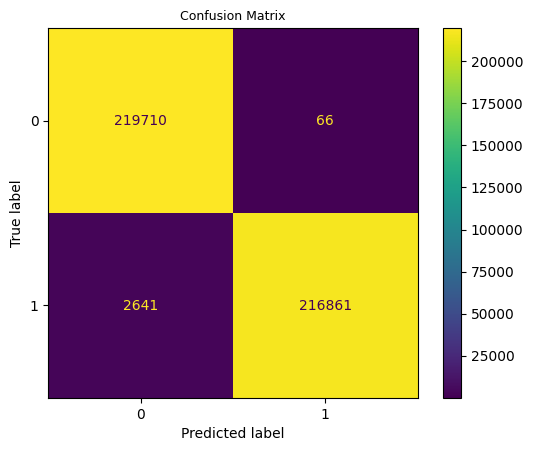

In [59]:
cm = ConfusionMatrixDisplay(cm)
cm.plot()
plt.title('Confusion Matrix',fontsize=9)
plt.show()

In [60]:
print(classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.98812   0.99970   0.99388    219776
           1    0.99970   0.98797   0.99380    219502

    accuracy                        0.99384    439278
   macro avg    0.99391   0.99383   0.99384    439278
weighted avg    0.99391   0.99384   0.99384    439278



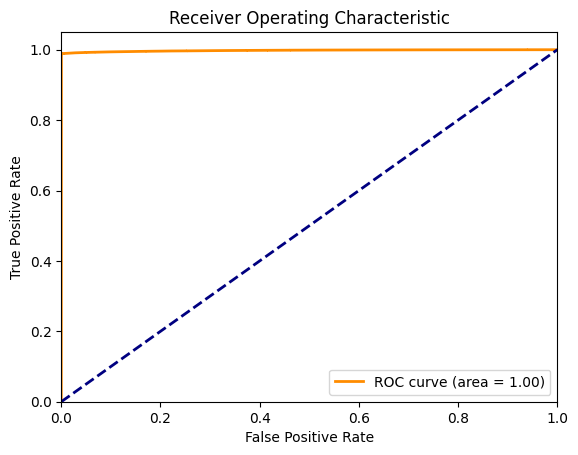

In [61]:
from sklearn.metrics import roc_curve, auc,matthews_corrcoef
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [62]:
mcc = matthews_corrcoef(y_test, y_pred)


In [63]:

print("Matthews Correlation Coefficient:", mcc)


Matthews Correlation Coefficient: 0.9877430203766229


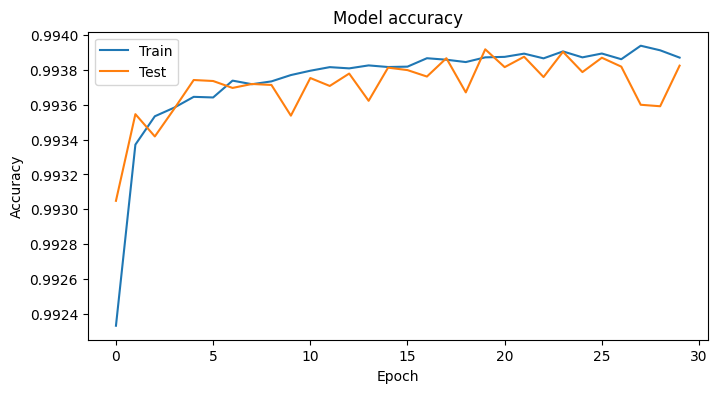

In [64]:
# Plot training & validation accuracy values
plt.figure(figsize= (8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

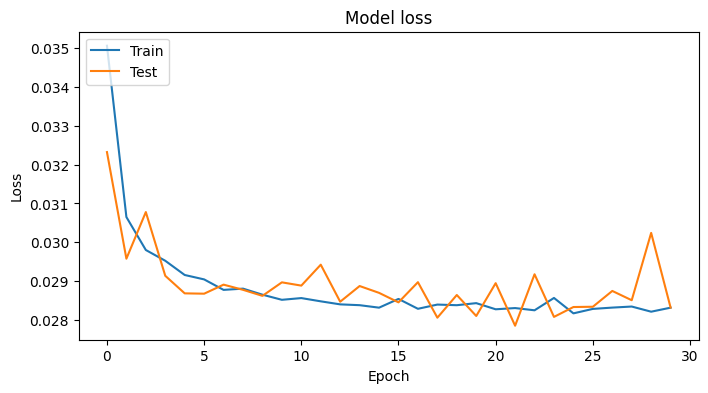

In [65]:
# Plot training & validation loss values
plt.figure(figsize= (8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

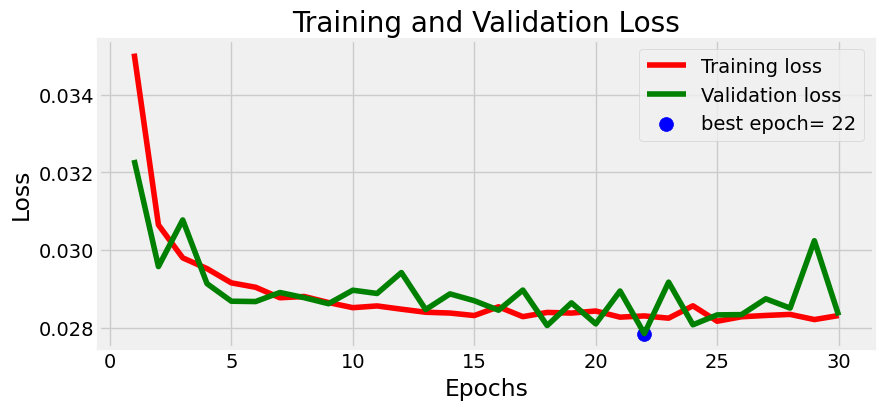

In [66]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (10, 4))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 100, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()